## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
# I had some warinings in the output so I will not display them 
import warnings
warnings.filterwarnings('ignore')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#read the data
df = pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [4]:
#look at the top few rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
#see if there any null values or wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

In [7]:
#get the unique values at the group column
df['group'].unique()

array(['control', 'treatment'], dtype=object)

In [8]:
#get the unique values at the landing_page column
df['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [9]:
#get the unique values at the converted column
df['converted'].unique()

array([0, 1], dtype=int64)

d. The proportion of users converted.

In [10]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [11]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [12]:
df.isnull().any().any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2.duplicated('user_id', False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
df2.loc[2893]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2 = df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2[df['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2[df['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2[df2['landing_page'] == 'new_page']['landing_page'].count() / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**  

from (d) seems we have the same sample size for both the control and the treatment group  
from (a & b & c) the calculated probability is pretty close to each other,  
so there is no sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**  

H0: 𝑝_𝑜𝑙𝑑 - 𝑝_𝑛𝑒𝑤 >= 0   
H1: 𝑝_𝑜𝑙𝑑 - 𝑝_𝑛𝑒𝑤 <  0  


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [23]:
#sample size equal the ones in ab_data.csv

sample_size = df2['converted'].sum()
sample_size

34753

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
df2['converted'].mean()


0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$?

In [26]:
df2[df['group'] == 'treatment']['converted'].count()


145310

d. What is $n_{old}$?

In [27]:
df2[df['group'] == 'control']['converted'].count()


145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = df2[df['group'] == 'treatment']['converted']

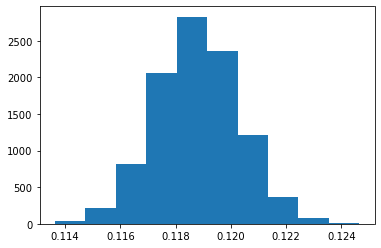

In [29]:
sampling_mean_new = []

for _ in range(10000):
    bootsamp = new_page_converted.sample(sample_size)
    sample_mean = bootsamp.mean()
    sampling_mean_new.append(sample_mean)
    
plt.hist(sampling_mean_new);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = df2[df['group'] == 'control']['converted']

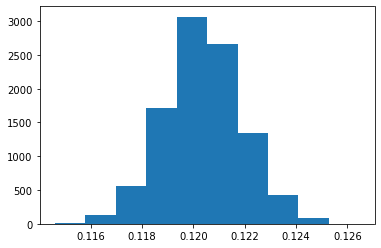

In [31]:
sampling_mean_old = []

for _ in range(10000):
    bootsamp = old_page_converted.sample(sample_size)
    sample_mean = bootsamp.mean()
    sampling_mean_old.append(sample_mean)
    
plt.hist(sampling_mean_old);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

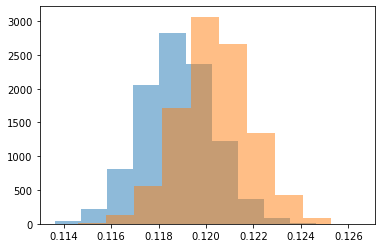

In [32]:
plt.hist(sampling_mean_new, alpha = 0.5); #both distribution looks normal because the central limit theorem
plt.hist(sampling_mean_old, alpha = 0.5);


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
p_diffs =[]

for _ in range(10000):
    
    #bootsamp the new page
    bootsamp1 = new_page_converted.sample(sample_size)
    sample_mean1 = bootsamp1.mean()
    
    #bootsamp the old page
    bootsamp2 = old_page_converted.sample(sample_size)
    sample_mean2 = bootsamp2.mean()
    
    #p_diffs = sample_mean1 - sample_mean2
    p_diffs.append(sample_mean1 - sample_mean2)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

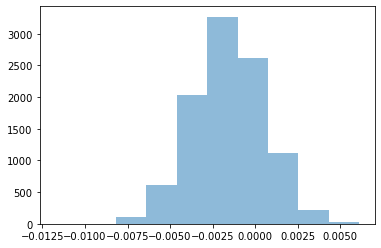

In [34]:
plt.hist(p_diffs, alpha = 0.5);  #it looks normal - this is by the central limit theorem

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

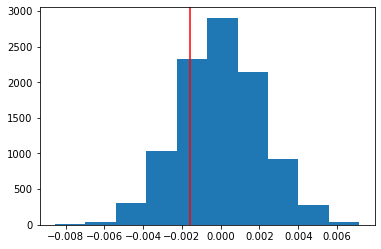

In [35]:
#10000 draws from the sampling distribution under the null
null_vals = np.random.normal(0, np.std(p_diffs), 10000) 
                             
#sampling distribution of the difference under the null  
plt.hist(null_vals);                                                           

obs_mean = np.mean(p_diffs)

#draw the mean of the difference between means 
plt.axvline(obs_mean, color = 'red'); 

In [36]:
# probability of a statistic higher than observed
p_value = (null_vals > obs_mean).mean()
p_value

0.761

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

the value we computed is called p_value and because the p_value = 0.7706 which means its bigger than alpha 0.05   
so we don't have enough evidence to reject the null hypothesis   
the new_page is not better than the old_page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2[df['landing_page'] == 'old_page']['converted'].sum()
convert_new = df2[df['landing_page'] == 'new_page']['converted'].sum()
n_old = df2[df['landing_page'] == 'old_page']['converted'].count()
n_new = df2[df['landing_page'] == 'new_page']['converted'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print ("z_score: {} , p_value: {}".format(z_score, p_value))

if p_value > .05:
   print ("Fail to reject the null hypothesis - the new page is not better than the old")
else:
   print ("Reject the null hypothesis - the new page is better")

z_score: 1.3109241984234394 , p_value: 0.9050583127590245
Fail to reject the null hypothesis - the new page is not better than the old


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**  
z_score: 1.31 and  p_value: 0.905  
Fail to reject the null hypothesis - the new page is not better than the old   
the results in J and K are equal (we fail to reject the null hypothesis)  


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

**logestic regression** because the conversion is a categorical data either 1 or 0

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [40]:
import statsmodels.api as sm;

In [41]:
landing_page_dummies = pd.get_dummies(df2['landing_page'])
df2_new = df2.join(landing_page_dummies)

df2_new.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
df2_new['intercept'] = 1
log_mod = sm.Logit(df2_new['converted'], df2_new[['intercept','new_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        09:20:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
new_page      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [44]:
np.exp(0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

H0  is that the slope is 0   
H1  is that slope is non-zero  

p-value associated with ab_page is 0.19,not statistically significant, so the slope is zero  
we fail to reject the null, there is no meaningful straight-line relationship but there is a relationship

in part2 we was looking for if there a significant difference in the conversion rate between the old_page and the new_page  
but here we are looking for if the slope is zero or non-zero 

we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test.
an that is because we have different hypotheses  

in part 2  
Our null hypothesis is that the mean is p_old >= p_new. A one-tailed test will test either if the difference is significantly   greater than zero or if the mean is significantly less than zero,  

in part 3  
Our null hypothesis is that the slope is equal to zero. A two-tailed test will test both if the slope is significantly greater  than zero and if the mean significantly less than zero.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

maybe we can filter the timestamp column to be either am or pm and get this dummy variables in two new column and  
add them to the logestic regression model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [47]:
# Create the necessary dummy variables
country_dummies = pd.get_dummies(df_new['country'])

landing_page_dummies = pd.get_dummies(df_new['landing_page'])

df3_new = df_new.join(landing_page_dummies)
df3_new = df3_new.join(country_dummies)
df3_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0


In [48]:
### Fit Your Linear Model And Obtain the Results

df3_new['intercept'] = 1
log_mod = sm.Logit(df3_new['converted'], df3_new[['intercept', 'old_page', 'CA', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        09:20:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [49]:
np.exp(results.params)

intercept    0.134766
old_page     1.015056
CA           0.960062
UK           1.009932
dtype: float64

If an individual land on old_page,  
he is 1.015056 more likely to convert than if they landed on the new_page, holding all other variables constant.  

If an individual was from CA,  
he is 0.960062 more likely to convert than if they was from USA, holding all other variables constant.  

If an individual was from UK,  
he is 1.009932 more likely to convert than if they was from USA, holding all other variables constant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
#creat variables for the interaction between page and country

df3_new['UK_ab_page'] =df3_new['UK'] * df3_new['new_page']
df3_new['US_ab_page'] =df3_new['US'] * df3_new['new_page']
df3_new['CA_ab_page'] =df3_new['CA'] * df3_new['new_page']

df3_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,CA,UK,US,intercept,UK_ab_page,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,0,1,0,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,0,1,0,1,1,0,0


In [54]:
#df3_new['intercept'] = 1
log_mod = sm.Logit(df3_new['converted'], df3_new[['intercept', 'new_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        09:21:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page      -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [55]:
np.exp(results.params)

intercept     0.134794
new_page      0.934776
UK            1.011854
US            1.017682
UK_ab_page    1.081428
US_ab_page    1.048001
dtype: float64

If an individual land on new_page,  
he is 0.934776 more likely to convert than if they landed on the old_page, holding all other variables constant.  

If an individual was from US,  
he is 1.017682 more likely to convert than if they was from USA, holding all other variables constant.  

If an individual was from UK,  
he is 1.011854 more likely to convert than if they was from USA, holding all other variables constant  

If an individual was from US interact with the new_page,  
he is 1.048001 more likely to convert than if they was from CA, holding all other variables constant.  

If an individual was from UK interact with the new_page  
he is 1.081428 more likely to convert than if they was from CA, holding all other variables constant  

<a id='conclusions'></a>
## Conclusions

the probability in part(1) did not give us sufficient evidence to say that the new treatment page leads to more conversions. 

the ab_test in part(2) we failed to reject the null hypothesis
(the new_page is not better than the old_page)

the logestic regression part(3) the p_value was not statistically significant, we fail to reject the null,
there is no meaningful straight-line relationship but there is a relationship
 

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.